## Read and store data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
import statistics

In [33]:
# Scenario I experimental setting
name_folder_list_true_null = ['data' + 'True' + '/']
ns_list_true_null = np.arange(100, 1050, 50)
ns_array_true_null = np.array(ns_list_true_null)
b_list_true_null = ['I']
methods_true_null = ['DR-xKTE', 'IPW-xKTE']
case_list_true_null = [1, 2]

# Scenario I observational setting
name_folder_list_false_null = ['data' + 'False' + '/']
ns_list_false_null = np.arange(100, 1050, 50)
ns_array_false_null = np.array(ns_list_false_null)
b_list_false_null = ['I']
methods_false_null = ['DR-xKTE']
case_list_false_null = [1, 2]

# Scenarios II, III, IV experimental setting 
name_folder_list_true = ['data' + 'True' + '/']
ns_list_true = [100, 150, 200, 250, 300, 350]
ns_array_true = np.array(ns_list_true)
b_list_true = ['II', 'III', 'IV']
methods_true = ['DR-xKTE', 'IPW-xKTE', 'KTE']
case = 2
case_list_true = [case]

# Scenarios II, III, IV observational setting
name_folder_list_false = ['data' + 'False' + '/']
ns_list_false = [100, 150, 200, 250, 300, 350]
ns_array_false = np.array(ns_list_false)
b_list_false = ['II', 'III', 'IV']
methods_false = ['DR-xKTE', 'Vanilla_DR', 'BART', 'CausalForest']
case = 2
case_list_false = [case]

In [34]:
d = dict()
for name_folder in name_folder_list_true_null:
    for b in b_list_true_null:
        for method in methods_true_null:
            for case in case_list_true_null:
                for ns in ns_array_true_null:
                    name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
                    d[name] = pd.read_csv(name, index_col = 0)

for name_folder in name_folder_list_false_null:
    for b in b_list_false_null:
        for method in methods_false_null:
            for case in case_list_false_null:
                for ns in ns_array_false_null:
                    name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
                    d[name] = pd.read_csv(name, index_col = 0)
                    
for name_folder in name_folder_list_true:
    for b in b_list_true:
        for method in methods_true:
            for case in case_list_true:
                for ns in ns_array_true:
                    name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
                    d[name] = pd.read_csv(name, index_col = 0)

for name_folder in name_folder_list_false:
    for b in b_list_false:
        for method in methods_false:
            for case in case_list_false:
                for ns in ns_array_false:
                    name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
                    d[name] = pd.read_csv(name, index_col = 0)
                    



# DEF PLOTS

## Null hypothesis

### Experimental setting

500
500


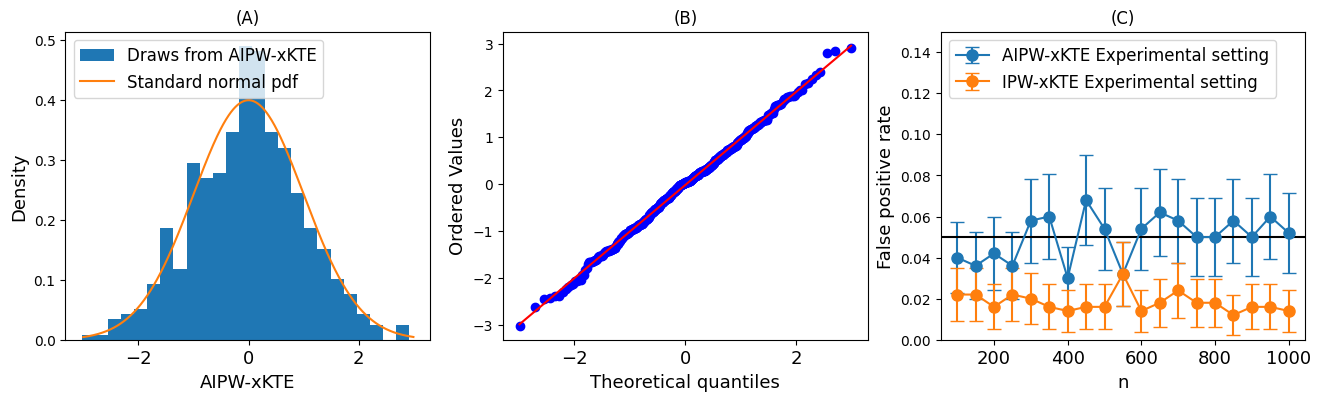

In [35]:
case = 1

plt.rcParams["figure.figsize"] = (16,4)
MEDIUM_SIZE=13
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 

b = 'I'
ns = 500
method = 'DR-xKTE'
experiment = True
name_folder = 'data' + str(experiment) + '/'
name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'


plt.subplot(1, 3, 1)
bins = 25
x_axis = np.arange(-3, 3, 0.01)
stat_values = d[name]['stat_values']
plt.hist(stat_values, bins = bins, density=True, label="Draws from AIPW-xKTE")
plt.plot(x_axis, norm.pdf(x_axis, 0, 1), label='Standard normal pdf' )

plt.legend(loc="upper left")
plt.xlabel("AIPW-xKTE")
plt.ylabel("Density")
plt.title("(A)")
  

stats.probplot(stat_values, dist="norm", plot=plt.subplot(1, 3, 2))
plt.title("(B)")

m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
m_dict_title = {0: " Experimental setting", 1: " Observational setting"}
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE'}

plt.subplot(1, 3, 3)

confidence_level = 0.05
method_list = ['DR-xKTE', 'IPW-xKTE']
name_folder_list =  ['data' + 'True' + '/']
ns_list = np.arange(100, 1050, 50)
ns_array = np.array(ns_list)
rejection_proportion = np.zeros(len(ns_list))

for k, name_folder in enumerate(name_folder_list):
    for i, method in enumerate(method_list):
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[j] = (d[name]['p_values'] < confidence_level).mean()
        varhat = rejection_proportion*(1 - rejection_proportion)/len(d[name]['p_values'])
        print(len(d[name]['p_values']))
        if i == 0:
            plt.errorbar(ns_array, rejection_proportion, yerr=1.96*np.sqrt(varhat), capsize=5, label=method_dict[method]+ m_dict_title[k], marker = m_dict[k], markersize=8, color = "C0")
        else:
            plt.errorbar(ns_array, rejection_proportion, yerr=1.96*np.sqrt(varhat), capsize=5, label=method_dict[method]+m_dict_title[k], marker = m_dict[k], markersize=8, color = "C1")
    
plt.title("(C)")
plt.xlabel("n")
plt.ylabel("False positive rate")
plt.axhline(confidence_level, c = "Black")
plt.ylim((0, confidence_level*3))
plt.legend(loc='upper left')
    
#plt.savefig("plots/null_dr.png", bbox_inches='tight')
plt.savefig("plots/REVIEWED_null_dr_experimental" + str(case) + "errorbar.png", bbox_inches='tight')

### Observational setting

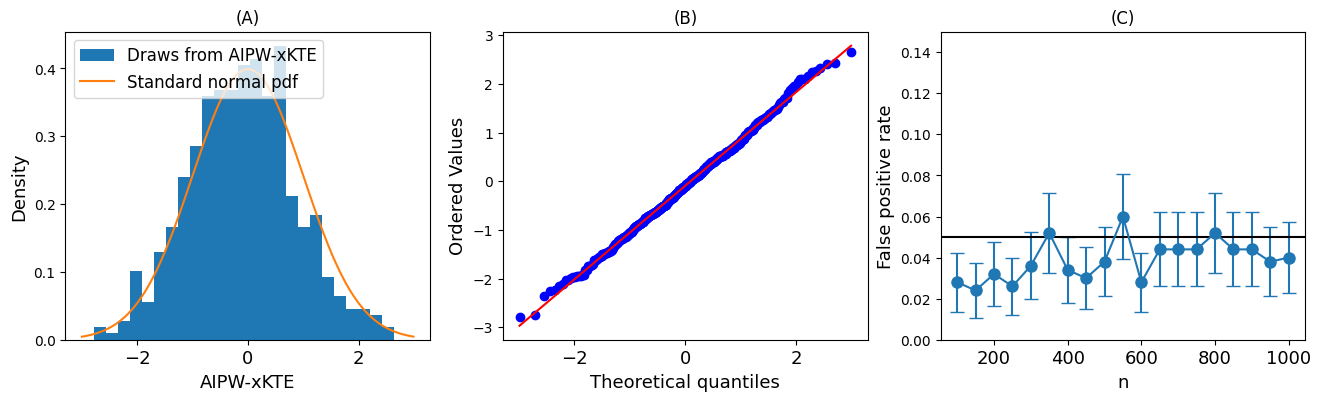

In [30]:
case = 1

plt.rcParams["figure.figsize"] = (16,4)
MEDIUM_SIZE=13
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
b = 'I'
ns = 500
method = 'DR-xKTE'
experiment = False
name_folder = 'data' + str(experiment) + '/'

name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'


plt.subplot(1, 3, 1)
bins = 25
x_axis = np.arange(-3, 3, 0.01)
stat_values = d[name]['stat_values']
plt.hist(stat_values, bins = bins, density=True, label="Draws from AIPW-xKTE")
plt.plot(x_axis, norm.pdf(x_axis, 0, 1), label='Standard normal pdf' )

plt.legend(loc="upper left")
plt.xlabel("AIPW-xKTE")
plt.ylabel("Density")
plt.title("(A)")
  

stats.probplot(stat_values, dist="norm", plot=plt.subplot(1, 3, 2))
plt.title("(B)")

m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
# m_dict_title = {0: "Observational setting", 1: " Observational setting"}
method_dict = {'DR-xKTENEW': 'AIPW-xKTE', 'IPW-xKTENEW': 'IPW-xKTE', 'KTE': 'KTE'}

plt.subplot(1, 3, 3)

confidence_level = 0.05
method_list = ['DR-xKTE']
name_folder_list =  ['data' + 'False' + '/']
ns_list = np.arange(100, 1050, 50)
ns_array = np.array(ns_list)
rejection_proportion = np.zeros(len(ns_list))

for k, name_folder in enumerate(name_folder_list):
    for i, method in enumerate(method_list):
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[j] = (d[name]['p_values'] < confidence_level).mean()
        if i == 0:
            varhat = rejection_proportion*(1 - rejection_proportion)/len(d[name]['p_values'])
            plt.errorbar(x=ns_array, y=rejection_proportion, yerr=1.96*np.sqrt(varhat), capsize=5, marker = m_dict[k], markersize=8, color = "C0")
        
    
plt.title("(C)")
plt.xlabel("n")
plt.ylabel("False positive rate")
plt.axhline(confidence_level, c = "Black")
plt.ylim((0, confidence_level*3))
# plt.legend(loc='upper left')
    
#plt.savefig("plots/null_dr.png", bbox_inches='tight')
plt.savefig("plots/REVIEWED_null_dr_observational" + str(case) + "errorbar.png", bbox_inches='tight')

### The two combined

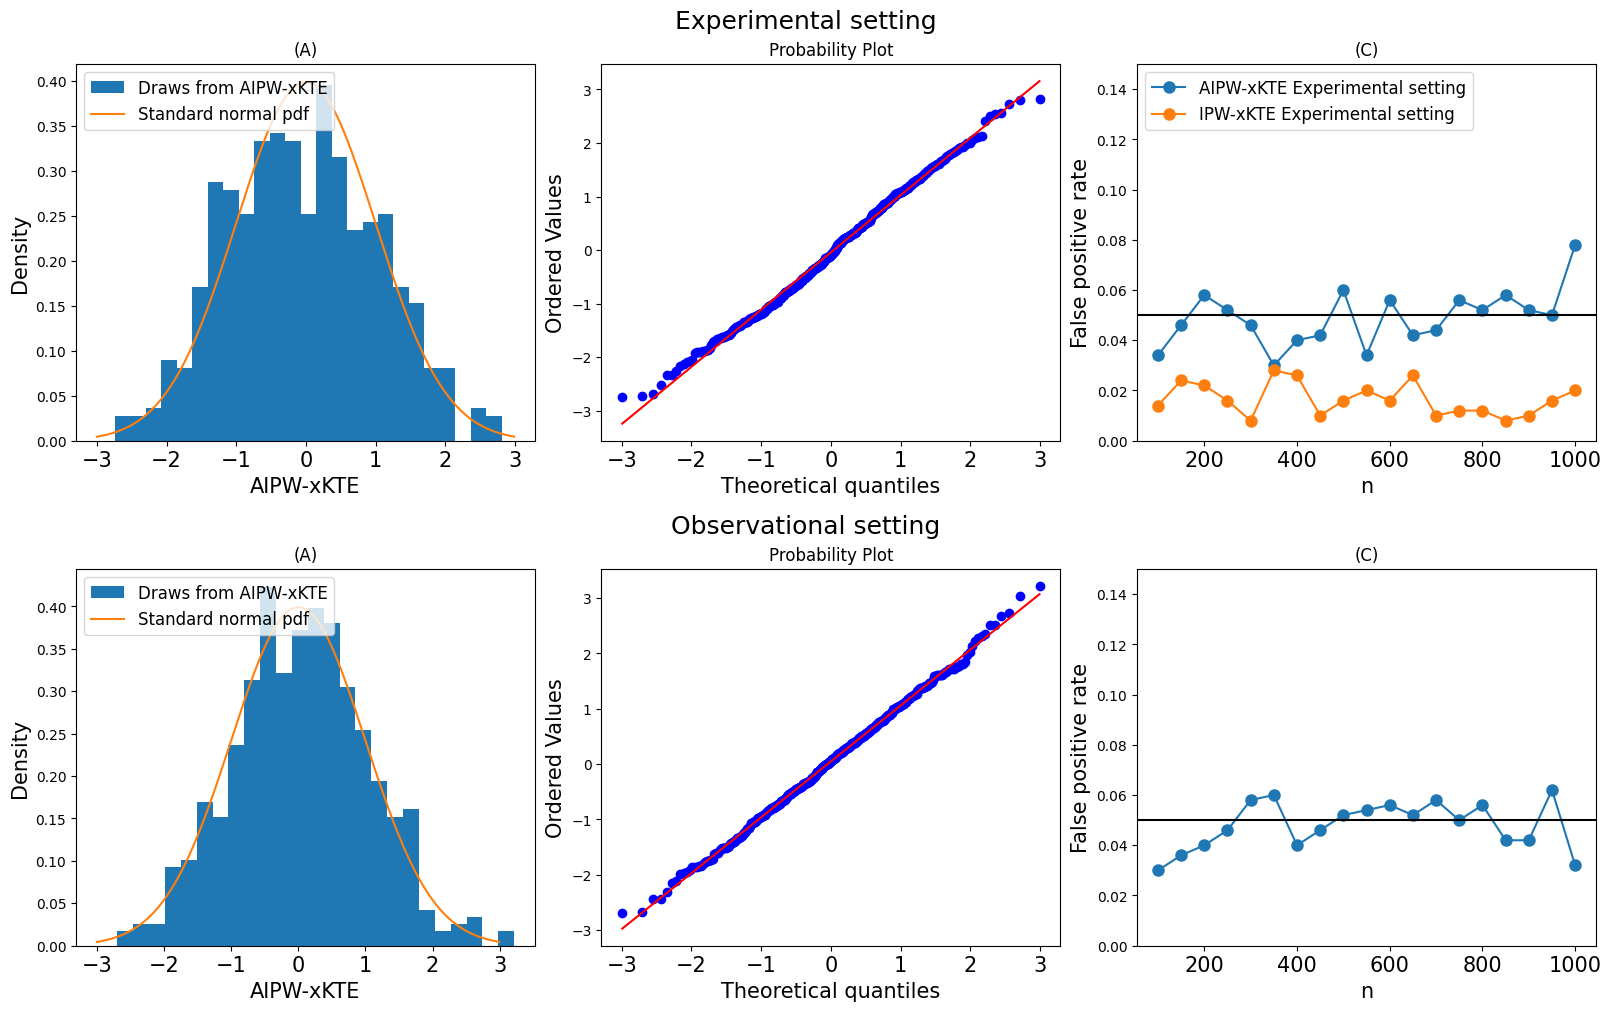

In [19]:
case = 2

plt.rcParams["figure.figsize"] = (16,8)
MEDIUM_SIZE=13
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 

b = 'I'
ns = 500
method = 'DR-xKTE'
experiment = True
name_folder = 'data' + str(experiment) + '/'
name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'

plt.rcParams["figure.figsize"] = (16,10)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
row_to_title = ['Experimental setting', 'Observational setting']

subfigs = fig.subfigures(nrows=2, ncols=1)

subfig = subfigs[0] 
row = 0
subfig.suptitle(row_to_title[row], fontsize = 18)

# create 1x3 subplots per subfig
axs = subfig.subplots(nrows=1, ncols=3)


bins = 25
x_axis = np.arange(-3, 3, 0.01)
stat_values = d[name]['stat_values']
axs[0].hist(stat_values, bins = bins, density=True, label="Draws from AIPW-xKTE")
axs[0].plot(x_axis, norm.pdf(x_axis, 0, 1), label='Standard normal pdf' )

axs[0].legend(loc="upper left")
axs[0].set_xlabel("AIPW-xKTE")
axs[0].set_ylabel("Density")
axs[0].set_title("(A)")
  

stats.probplot(stat_values, dist="norm", plot=axs[1])
plt.title("(B)")

m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
m_dict_title = {0: " Experimental setting", 1: " Observational setting"}
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE'}


confidence_level = 0.05
method_list = ['DR-xKTE', 'IPW-xKTE']
name_folder_list =  ['data' + 'True' + '/']
ns_list = np.arange(100, 1050, 50)
ns_array = np.array(ns_list)
rejection_proportion = np.zeros(len(ns_list))

for k, name_folder in enumerate(name_folder_list):
    for i, method in enumerate(method_list):
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[j] = (d[name]['p_values'] < confidence_level).mean()
        if i == 0:
            axs[2].plot(ns_array, rejection_proportion, label=method_dict[method]+ m_dict_title[k], marker = m_dict[k], markersize=8, color = "C0")
        else:
            plt.plot(ns_array, rejection_proportion,  label=method_dict[method]+m_dict_title[k], marker = m_dict[k], markersize=8, color = "C1")
    
axs[2].set_title("(C)")
axs[2].set_xlabel("n")
axs[2].set_ylabel("False positive rate")
axs[2].axhline(confidence_level, c = "Black")
axs[2].set_ylim((0, confidence_level*3))
axs[2].legend(loc='upper left')


row = 1
subfig = subfigs[1] 
subfig.suptitle(row_to_title[row], fontsize = 18)

# create 1x3 subplots per subfig
axs = subfig.subplots(nrows=1, ncols=3)


MEDIUM_SIZE=13
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
b = 'I'
ns = 500
method = 'DR-xKTE'
experiment = False
name_folder = 'data' + str(experiment) + '/'

name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'


bins = 25
x_axis = np.arange(-3, 3, 0.01)
stat_values = d[name]['stat_values']
axs[0].hist(stat_values, bins = bins, density=True, label="Draws from AIPW-xKTE")
axs[0].plot(x_axis, norm.pdf(x_axis, 0, 1), label='Standard normal pdf' )

axs[0].legend(loc="upper left")
axs[0].set_xlabel("AIPW-xKTE")
axs[0].set_ylabel("Density")
axs[0].set_title("(A)")
  

stats.probplot(stat_values, dist="norm", plot=axs[1])
plt.title("(B)")

m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
# m_dict_title = {0: "Observational setting", 1: " Observational setting"}
method_dict = {'DR-xKTENEW': 'AIPW-xKTE', 'IPW-xKTENEW': 'IPW-xKTE', 'KTE': 'KTE'}


confidence_level = 0.05
method_list = ['DR-xKTE']
name_folder_list =  ['data' + 'False' + '/']
ns_list = np.arange(100, 1050, 50)
ns_array = np.array(ns_list)
rejection_proportion = np.zeros(len(ns_list))

for k, name_folder in enumerate(name_folder_list):
    for i, method in enumerate(method_list):
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[j] = (d[name]['p_values'] < confidence_level).mean()
        if i == 0:
            axs[2].plot(ns_array, rejection_proportion, marker = m_dict[k], markersize=8, color = "C0")
        
    
axs[2].set_title("(C)")
axs[2].set_xlabel("n")
axs[2].set_ylabel("False positive rate")
axs[2].axhline(confidence_level, c = "Black")
axs[2].set_ylim((0, confidence_level*3))
# plt.legend(loc='upper left')

    
#plt.savefig("plots/null_dr.png", bbox_inches='tight')
plt.savefig("plots/REVIEWED_null_dr" + str(case) + "COMBINED.png", bbox_inches='tight')

In [ ]:
case = 2

ns_list = [100, 150, 200, 250, 300, 350]
ns_array = np.array(ns_list)

plt.rcParams["figure.figsize"] = (16,10)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
#plt.rcParams['axes.titlesize'] = 15

bs = ['II', 'III', 'IV']
bs_title = ['(II)', '(III)', '(IV)']
row_to_title = ['Experimental setting', 'Observational setting']
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE', 'BART': 'BART', 
               'CausalForest': 'CausalForest', 'Vanilla_DR': 'Baseline-AIPW', 'DR-xKTENEW': 'AIPW-xKTE', 'IPW-xKTENEW': 'IPW-xKTE'}
m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
    
# create 2x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)


row = 0 
subfig = subfigs[0] 
subfig.suptitle(row_to_title[row], fontsize = 18)
name_folder = 'data' + 'True' + '/'

# create 1x3 subplots per subfig
axs = subfig.subplots(nrows=1, ncols=3)
for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((0., 1.05))
    ax.set_xlabel("n")
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_true), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_true): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        ax.plot(ns_array, rejection_proportion[i, :], label = method_dict[method], marker = m_dict[i], markersize=10)
    ax.legend(loc='lower left')
    
row = 1
subfig = subfigs[1] 
subfig.suptitle(row_to_title[row], fontsize = 18)
name_folder = 'data' + 'False' + '/'

# create 1x3 subplots per subfig
axs = subfig.subplots(nrows=1, ncols=3)
for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("n")
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_false), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_false): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        ax.plot(ns_array, rejection_proportion[i, :], label = method_dict[method], marker = m_dict[i], markersize=10)
    ax.legend(loc='lower left')

plt.savefig("plots/scenarios234" + str(case) + ".png", bbox_inches='tight')    
#fontweight = 'bold'
        

### Time table

In [13]:
plt.rcParams["figure.figsize"] = (16,5)

time = np.zeros((len(methods_true), len(ns_list_true) ))
b = 'I'
        
name_folder = 'data' + 'True' + '/'
for i, method in enumerate(methods_true): 
    for j, ns in enumerate(ns_list_true):
        name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
        time[i, j] = d[name]['times'].mean()

time_df = pd.DataFrame(time.T*1000, ns_list_true, methods_true)
print(time_df.T.to_latex(float_format="{:0.3f}".format))

KeyError: 'dataTrue/ns100bIcase2KTE.csv'

## True positive rates

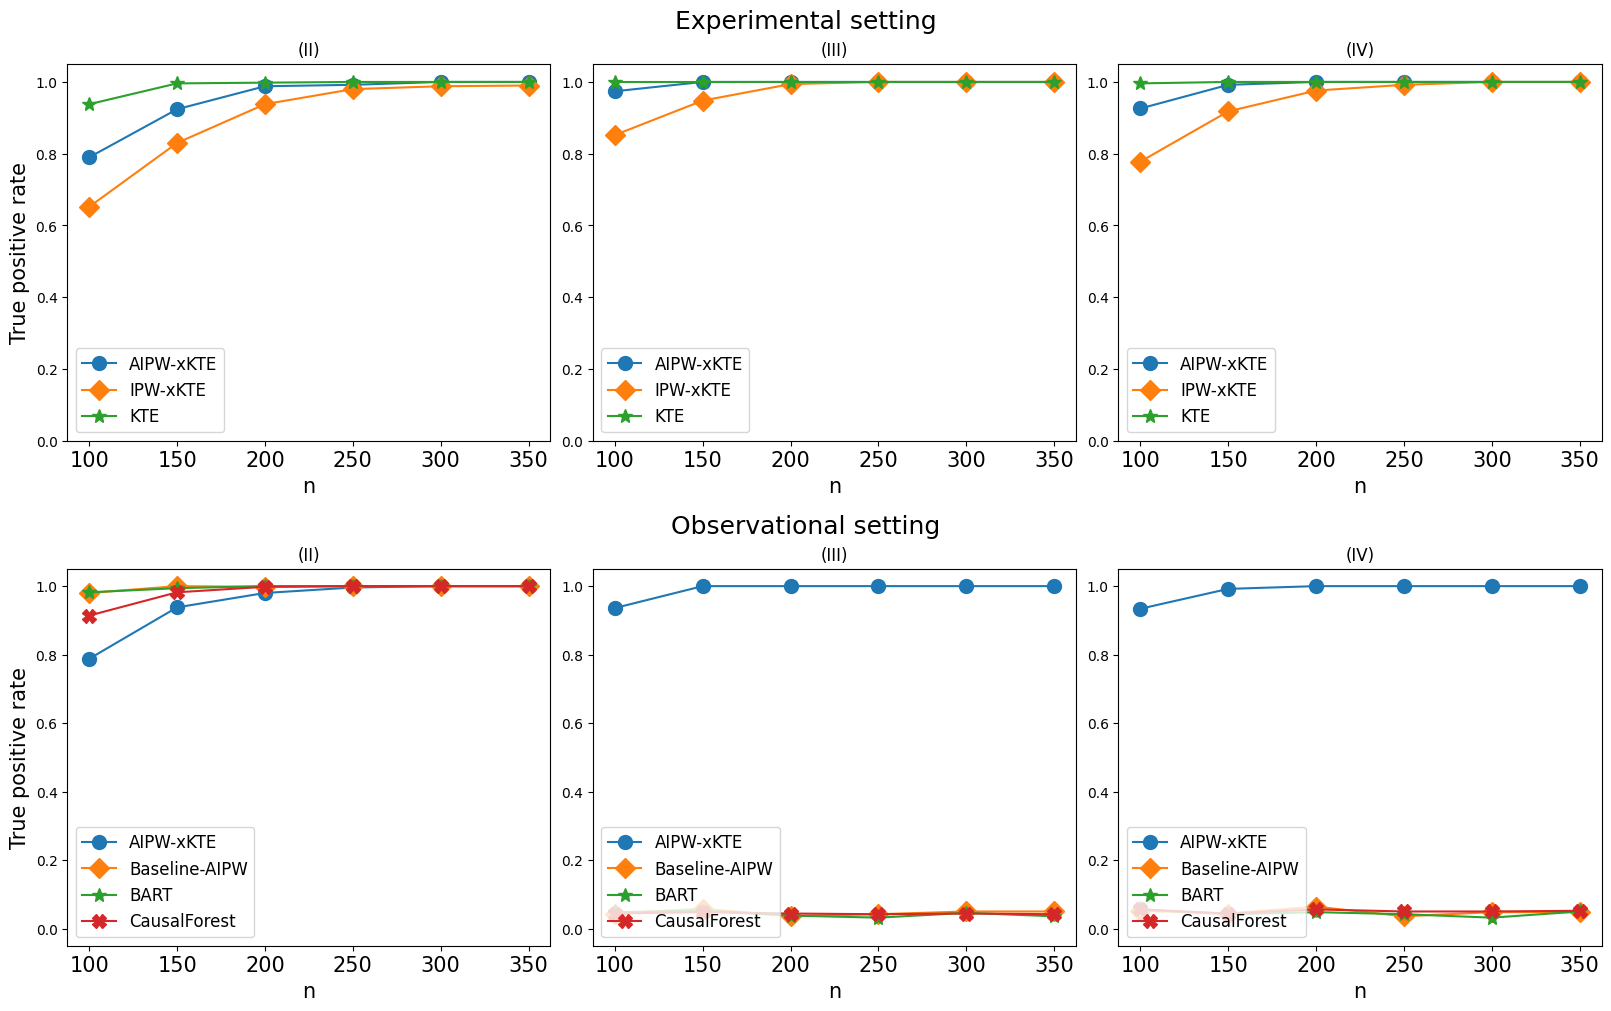

In [37]:
case = 2

ns_list = [100, 150, 200, 250, 300, 350]
ns_array = np.array(ns_list)

plt.rcParams["figure.figsize"] = (16,10)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
#plt.rcParams['axes.titlesize'] = 15

bs = ['II', 'III', 'IV']
bs_title = ['(II)', '(III)', '(IV)']
row_to_title = ['Experimental setting', 'Observational setting']
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE', 'BART': 'BART', 
               'CausalForest': 'CausalForest', 'Vanilla_DR': 'Baseline-AIPW', 'DR-xKTENEW': 'AIPW-xKTE', 'IPW-xKTENEW': 'IPW-xKTE'}
m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
    
# create 2x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)


row = 0 
subfig = subfigs[0] 
subfig.suptitle(row_to_title[row], fontsize = 18)
name_folder = 'data' + 'True' + '/'

# create 1x3 subplots per subfig
axs = subfig.subplots(nrows=1, ncols=3)
for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((0., 1.05))
    ax.set_xlabel("n")
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_true), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_true): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        ax.plot(ns_array, rejection_proportion[i, :], label = method_dict[method], marker = m_dict[i], markersize=10)
    ax.legend(loc='lower left')
    
row = 1
subfig = subfigs[1] 
subfig.suptitle(row_to_title[row], fontsize = 18)
name_folder = 'data' + 'False' + '/'

# create 1x3 subplots per subfig
axs = subfig.subplots(nrows=1, ncols=3)
for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("n")
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_false), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_false): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        ax.plot(ns_array, rejection_proportion[i, :], label = method_dict[method], marker = m_dict[i], markersize=10)
    ax.legend(loc='lower left')

#plt.savefig("plots/scenarios234" + str(case) + ".png", bbox_inches='tight')    
#fontweight = 'bold'
        

### Divide in two

KeyError: 'dataTrue/ns100bIIcase1DR-xKTE.csv'

<Figure size 1600x400 with 0 Axes>

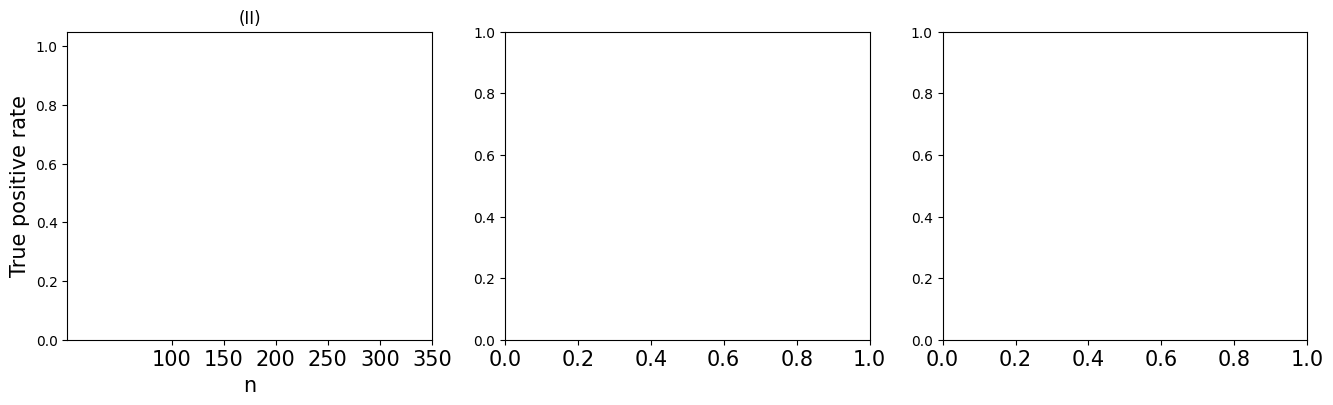

In [38]:
case = 1
confidence_level = 0.05



plt.rcParams["figure.figsize"] = (16,4)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
#plt.rcParams['axes.titlesize'] = 15

bs = ['II', 'III', 'IV']
bs_title = ['(II)', '(III)', '(IV)']
row_to_title = ['Experimental setting', 'Observational setting']
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE', 'BART': 'BART', 
               'CausalForest': 'CausalForest', 'Vanilla_DR': 'Baseline-AIPW', 'DR-xKTENEW': 'AIPW-xKTE', 'IPW-xKTENEW': 'IPW-xKTE'}
m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
    




name_folder = 'data' + 'True' + '/'
ns_list = [100, 150, 200, 250, 300, 350]
ns_array = np.array(ns_list)
fig, axs = plt.subplots(1, 3)
# create 1x3 subplots per subfig
for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((0., 1.05))
    ax.set_xlabel("n")
    ax.set_xticks([100, 150, 200, 250, 300, 350])
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_true), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_true): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        varhat = rejection_proportion[i, :]*(1 - rejection_proportion[i, :])/len(d[name]['p_values'])  
        ax.errorbar(x=ns_array, y=rejection_proportion[i, :], yerr=1.96*np.sqrt(varhat), capsize=5, label = method_dict[method], marker = m_dict[i], markersize=10)
    ax.legend(loc='lower left')
    


plt.savefig("plots/REVIEWED_scenarios234_experimental" + str(case) + "errorbar.png", bbox_inches='tight')    
#fontweight = 'bold'
        

<Figure size 1600x400 with 0 Axes>

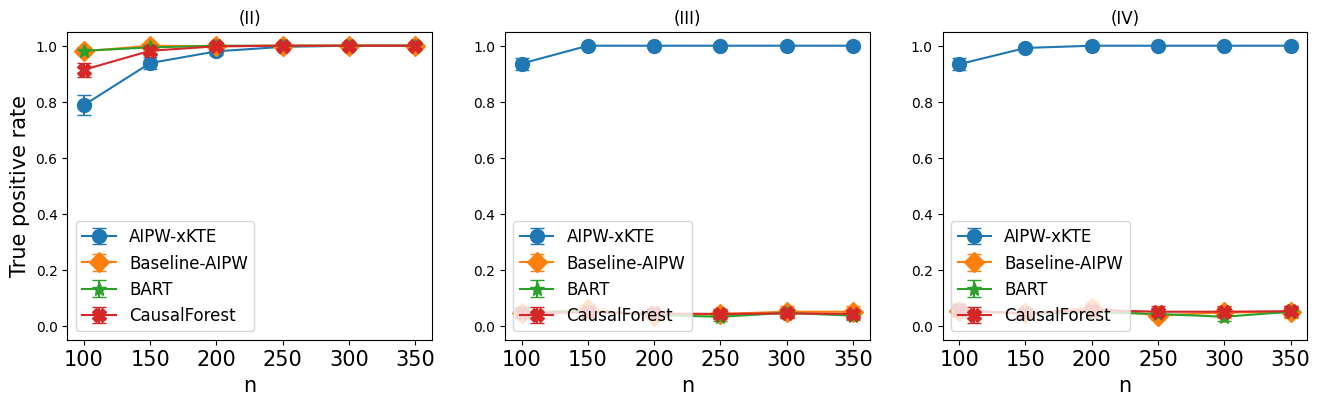

In [14]:
case = 2
confidence_level = 0.05

plt.rcParams["figure.figsize"] = (16,4)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
#plt.rcParams['axes.titlesize'] = 15

bs = ['II', 'III', 'IV']
bs_title = ['(II)', '(III)', '(IV)']
row_to_title = ['Experimental setting', 'Observational setting']
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE', 'BART': 'BART', 
               'CausalForest': 'CausalForest', 'Vanilla_DR': 'Baseline-AIPW', 'DR-xKTENEW': 'AIPW-xKTE (our proposal)', 'IPW-xKTENEW': 'IPW-xKTE'}
m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
    




name_folder = 'data' + 'False' + '/'

fig, axs = plt.subplots(1, 3)

for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("n")
    ax.set_xticks([100, 150, 200, 250, 300, 350])
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_false), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_false): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        varhat = rejection_proportion[i, :]*(1 - rejection_proportion[i, :])/len(d[name]['p_values'])
        ax.errorbar(x=ns_array, y=rejection_proportion[i, :], yerr=1.96*np.sqrt(varhat), capsize=5, label = method_dict[method], marker = m_dict[i], markersize=10)

    ax.legend(loc='lower left')


plt.savefig("plots/REVIEWED_scenarios234_observational" + str(case) + "errorbar.png", bbox_inches='tight')    
#fontweight = 'bold'
        

## Case 1 (data in different folder)

In [16]:
# Scenarios II, III, IV experimental setting case 1
name_folder_list_true_case1 = ['DATA/data' + 'True' + '/']
ns_list_true = [100, 150, 200, 250, 300, 350]
ns_array_true = np.array(ns_list_true)
b_list_true = ['II', 'III', 'IV']
methods_true_case1 = ['DR-xKTENEW', 'IPW-xKTENEW', 'KTE']
case = 1
case_list_true = [case]

# Scenarios II, III, IV observational setting case 1
name_folder_list_false_case1 = ['DATA/data' + 'False' + '/']
ns_list_false = [100, 150, 200, 250, 300, 350]
ns_array_false = np.array(ns_list_false)
b_list_false = ['II', 'III', 'IV']
methods_false_case1 = ['DR-xKTENEW', 'Vanilla_DR', 'BART', 'CausalForest']
case = 1
case_list_false = [case]

d = dict()          
for name_folder in name_folder_list_true_case1:
    for b in b_list_true:
        for method in methods_true_case1:
            for case in case_list_true:
                for ns in ns_array_true:
                    name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
                    d[name] = pd.read_csv(name, index_col = 0)

for name_folder in name_folder_list_false_case1:
    for b in b_list_false:
        for method in methods_false_case1:
            for case in case_list_false:
                for ns in ns_array_false:
                    name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
                    d[name] = pd.read_csv(name, index_col = 0)

<Figure size 1600x400 with 0 Axes>

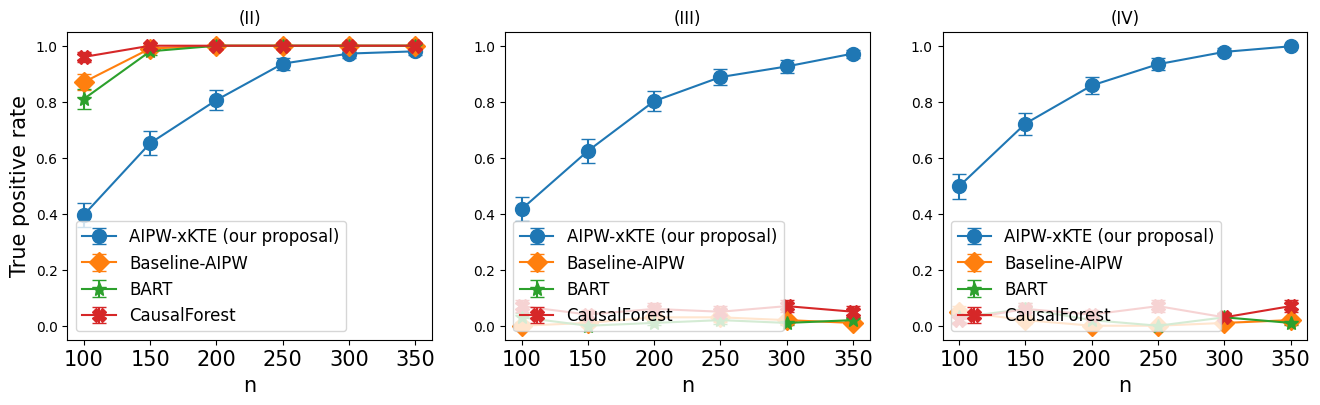

In [20]:
case = 1
confidence_level = 0.05

plt.rcParams["figure.figsize"] = (16,4)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
#plt.rcParams['axes.titlesize'] = 15

bs = ['II', 'III', 'IV']
bs_title = ['(II)', '(III)', '(IV)']
row_to_title = ['Experimental setting', 'Observational setting']
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE', 'BART': 'BART', 
               'CausalForest': 'CausalForest', 'Vanilla_DR': 'Baseline-AIPW', 'DR-xKTENEW': 'AIPW-xKTE (our proposal)', 'IPW-xKTENEW': 'IPW-xKTE'}
m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
    


name_folder = 'DATA/data' + 'False' + '/'

fig, axs = plt.subplots(1, 3)

for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((-0.05, 1.05))
    ax.set_xlabel("n")
    ax.set_xticks([100, 150, 200, 250, 300, 350])
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_false), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_false_case1): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        varhat = rejection_proportion[i, :]*(1 - rejection_proportion[i, :])/500
        ax.errorbar(x=ns_array, y=rejection_proportion[i, :], yerr=1.96*np.sqrt(varhat), capsize=5, label = method_dict[method], marker = m_dict[i], markersize=10)

    ax.legend(loc='lower left')


plt.savefig("plots/REVIEWED_scenarios234_observational" + str(case) + "errorbar.png", bbox_inches='tight')    
#fontweight = 'bold'
        

<Figure size 1600x400 with 0 Axes>

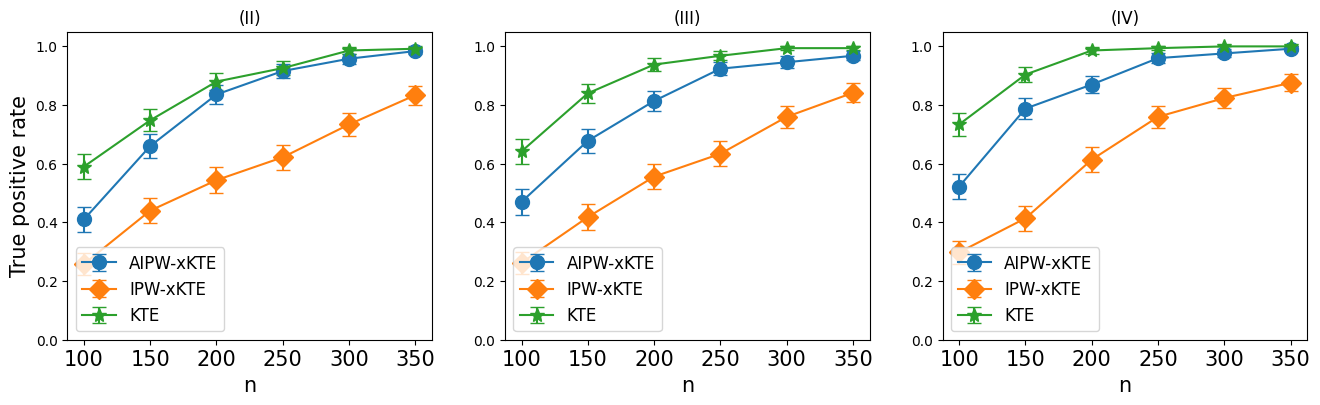

In [24]:
case = 1
confidence_level = 0.05



plt.rcParams["figure.figsize"] = (16,4)
plt.rc('legend',fontsize=12)
fig = plt.figure(constrained_layout=True)
MEDIUM_SIZE=15
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
#plt.rcParams['axes.titlesize'] = 15

bs = ['II', 'III', 'IV']
bs_title = ['(II)', '(III)', '(IV)']
row_to_title = ['Experimental setting', 'Observational setting']
method_dict = {'DR-xKTE': 'AIPW-xKTE', 'IPW-xKTE': 'IPW-xKTE', 'KTE': 'KTE', 'BART': 'BART', 
               'CausalForest': 'CausalForest', 'Vanilla_DR': 'Baseline-AIPW', 'DR-xKTENEW': 'AIPW-xKTE', 'IPW-xKTENEW': 'IPW-xKTE'}
m_dict = {0: "o", 1: "D", 2: "*", 3: "X", 4: "s"}
    




name_folder = 'DATA/data' + 'True' + '/'
ns_list = [100, 150, 200, 250, 300, 350]
ns_array = np.array(ns_list)
fig, axs = plt.subplots(1, 3)
# create 1x3 subplots per subfig
for col, ax in enumerate(axs):
    ax.plot()
    ax.set_title(bs_title[col])
    ax.set_ylim((0., 1.05))
    ax.set_xlabel("n")
    ax.set_xticks([100, 150, 200, 250, 300, 350])
    if col == 0:
        ax.set_ylabel("True positive rate")
    rejection_proportion = np.zeros((len(methods_true), len(ns_list)))
    b = bs[col]
    for i, method in enumerate(methods_true_case1): 
        for j, ns in enumerate(ns_list):
            name = name_folder + 'ns' + str(ns) + 'b' + str(b) + 'case' + str(case) + method + '.csv'
            rejection_proportion[i, j] = (d[name]['p_values'] < confidence_level).mean()
        varhat = rejection_proportion[i, :]*(1 - rejection_proportion[i, :])/500
        ax.errorbar(x=ns_array, y=rejection_proportion[i, :], yerr=1.96*np.sqrt(varhat), capsize=5, label = method_dict[method], marker = m_dict[i], markersize=10)
    ax.legend(loc='lower left')
    


plt.savefig("plots/REVIEWED_scenarios234_experimental" + str(case) + "errorbar.png", bbox_inches='tight')    
#fontweight = 'bold'
        